In [22]:
restr_fragments = open('restr_fragm_sample', 'r')
li_len = []
a = 0
ind = 0

for i in restr_fragments:
    ind += 1
    b = i.strip().split('\t')[1]
    if a != 0:
        li_len.append(float(b)-float(a))
        a = b
    else:
        a = b

In [23]:
print(li_len)

[74.0, 76.0, 765.0, 39.0, 57.0, 98.0, 178.0, 51.0, 490.0, 319.0, 77.0, 520.0, 374.0, 237.0, 336.0, 146.0, 45.0, 295.0, 101.0, 31.0, 548.0, 182.0, 373.0, 739.0, 121.0, 58.0, 180.0, 68.0, 39.0, 964.0, 246.0, 50.0, 8.0, 36.0, 284.0, 90.0, 10.0, 225.0, 70.0, 245.0, 49.0, 518.0, 259.0, 217.0, 388.0, 51.0, 572.0, 50.0, 381.0, 95.0, 24.0, 45.0, 172.0, 111.0, 197.0, 158.0, 240.0, 421.0, 9.0, 127.0, 122.0, 43.0, 115.0, 67.0, 106.0, 300.0, 399.0, 969.0, 379.0, 66.0, 318.0, 91.0, 181.0, 54.0, 89.0, 282.0, 411.0, 80.0, 214.0, 633.0, 917.0, 1054.0, 70.0, 115.0, 421.0, 17.0, 86.0, 122.0, 125.0, 30.0, 446.0, 146.0, 504.0, 114.0, 119.0, 197.0, 8.0, 165.0, 70.0]


In [24]:
textfile = open("list_len_file.txt", "w")
for i in li_len:
    textfile.write(str(i) + "\n")
textfile.close()

In [25]:
summ = 0
for i in li_len:
    summ+=i
ave = summ/len(li_len)
print(ave)

228.02020202020202


In [32]:
file_list = open('list_len_file.txt', "r")
li_lenn = []
for i in file_list:
    line = i.strip()
    #print(line)
    li_lenn.append(float(line))

In [33]:
print(li_lenn)

[74.0, 76.0, 765.0, 39.0, 57.0, 98.0, 178.0, 51.0, 490.0, 319.0, 77.0, 520.0, 374.0, 237.0, 336.0, 146.0, 45.0, 295.0, 101.0, 31.0, 548.0, 182.0, 373.0, 739.0, 121.0, 58.0, 180.0, 68.0, 39.0, 964.0, 246.0, 50.0, 8.0, 36.0, 284.0, 90.0, 10.0, 225.0, 70.0, 245.0, 49.0, 518.0, 259.0, 217.0, 388.0, 51.0, 572.0, 50.0, 381.0, 95.0, 24.0, 45.0, 172.0, 111.0, 197.0, 158.0, 240.0, 421.0, 9.0, 127.0, 122.0, 43.0, 115.0, 67.0, 106.0, 300.0, 399.0, 969.0, 379.0, 66.0, 318.0, 91.0, 181.0, 54.0, 89.0, 282.0, 411.0, 80.0, 214.0, 633.0, 917.0, 1054.0, 70.0, 115.0, 421.0, 17.0, 86.0, 122.0, 125.0, 30.0, 446.0, 146.0, 504.0, 114.0, 119.0, 197.0, 8.0, 165.0, 70.0]


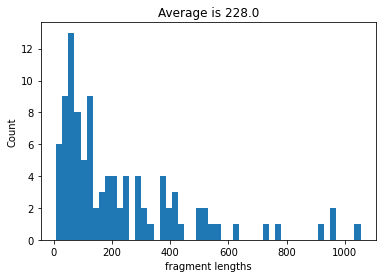

In [34]:
import matplotlib.pyplot as plt

x = li_lenn
plt.hist(x, density=False, bins=50) 
plt.ylabel('Count')
plt.xlabel('fragment lengths')
plt.title('Average is {}'.format(round(ave, 1)))
plt.savefig('fragment_sizes.png')

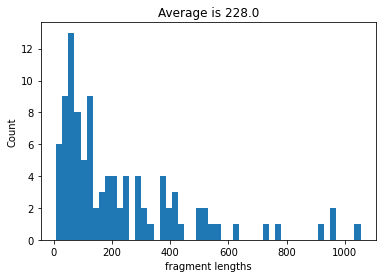

In [20]:
import matplotlib.pyplot as plt

x = li_len
plt.hist(x, density=False, bins=50) 
plt.ylabel('Count')
plt.xlabel('fragment lengths')
plt.title('Average is {}'.format(round(ave, 1)))
plt.savefig('fragment_sizes_true.png')

In [45]:
import numpy as np
import pandas as pd
from sys import argv
import matplotlib.pyplot as plt

In [46]:
filename_rsites = open('restr_fragm_sample', 'r')
rsites = pd.read_csv(filename_rsites, header=None, sep='\t')
rsites.columns = ['chrom', 'start', 'end', 'name', '_', 'strand']
rsites = rsites.sort_values(['chrom', 'start'])
rsites_grouped = rsites.groupby('chrom')

In [47]:
rsites

,chrom,start,end,name,_,strand
0,1,10802,10802,NlaIII_1,.,+
1,1,10876,10876,NlaIII_2,.,+
2,1,10952,10952,NlaIII_3,.,+
3,1,11717,11717,NlaIII_4,.,+
4,1,11756,11756,NlaIII_5,.,+
...,...,...,...,...,...,...
115,24,57214816,57214816,NlaIII_13815693,.,+
116,24,57215624,57215624,NlaIII_13815694,.,+
117,24,57216198,57216198,NlaIII_13815695,.,+
118,24,57216367,57216367,NlaIII_13815696,.,+


In [48]:
dct = {}

In [49]:
def ave(li):
    return sum(li)/len(li)
    

In [50]:
def leng(li):
    a = 0
    li_len = []
    for i in li:
        b = i
        if a != 0:
            li_len.append(b-a)
            a = b
        else:
            a = b
    return li_len

In [51]:
for ch in rsites_grouped.groups.keys():
    dct[ch] = list(rsites_grouped.get_group(ch)['start'].values)

In [52]:
aves = []
lists_len = []
for chs in dct.keys():
    li = dct[chs]
    lengs = leng(li)
    aves.append(ave(lengs))
    lists_len.append(lengs)

In [53]:
print(aves)

[228.02020202020202, 257.57894736842104]


In [83]:
print(max(lists_len[0]))

1054


In [ ]:
li=[[0,50000], [0,50000], [0,50000], [0,140000], [0,50000], [0,400000], ]

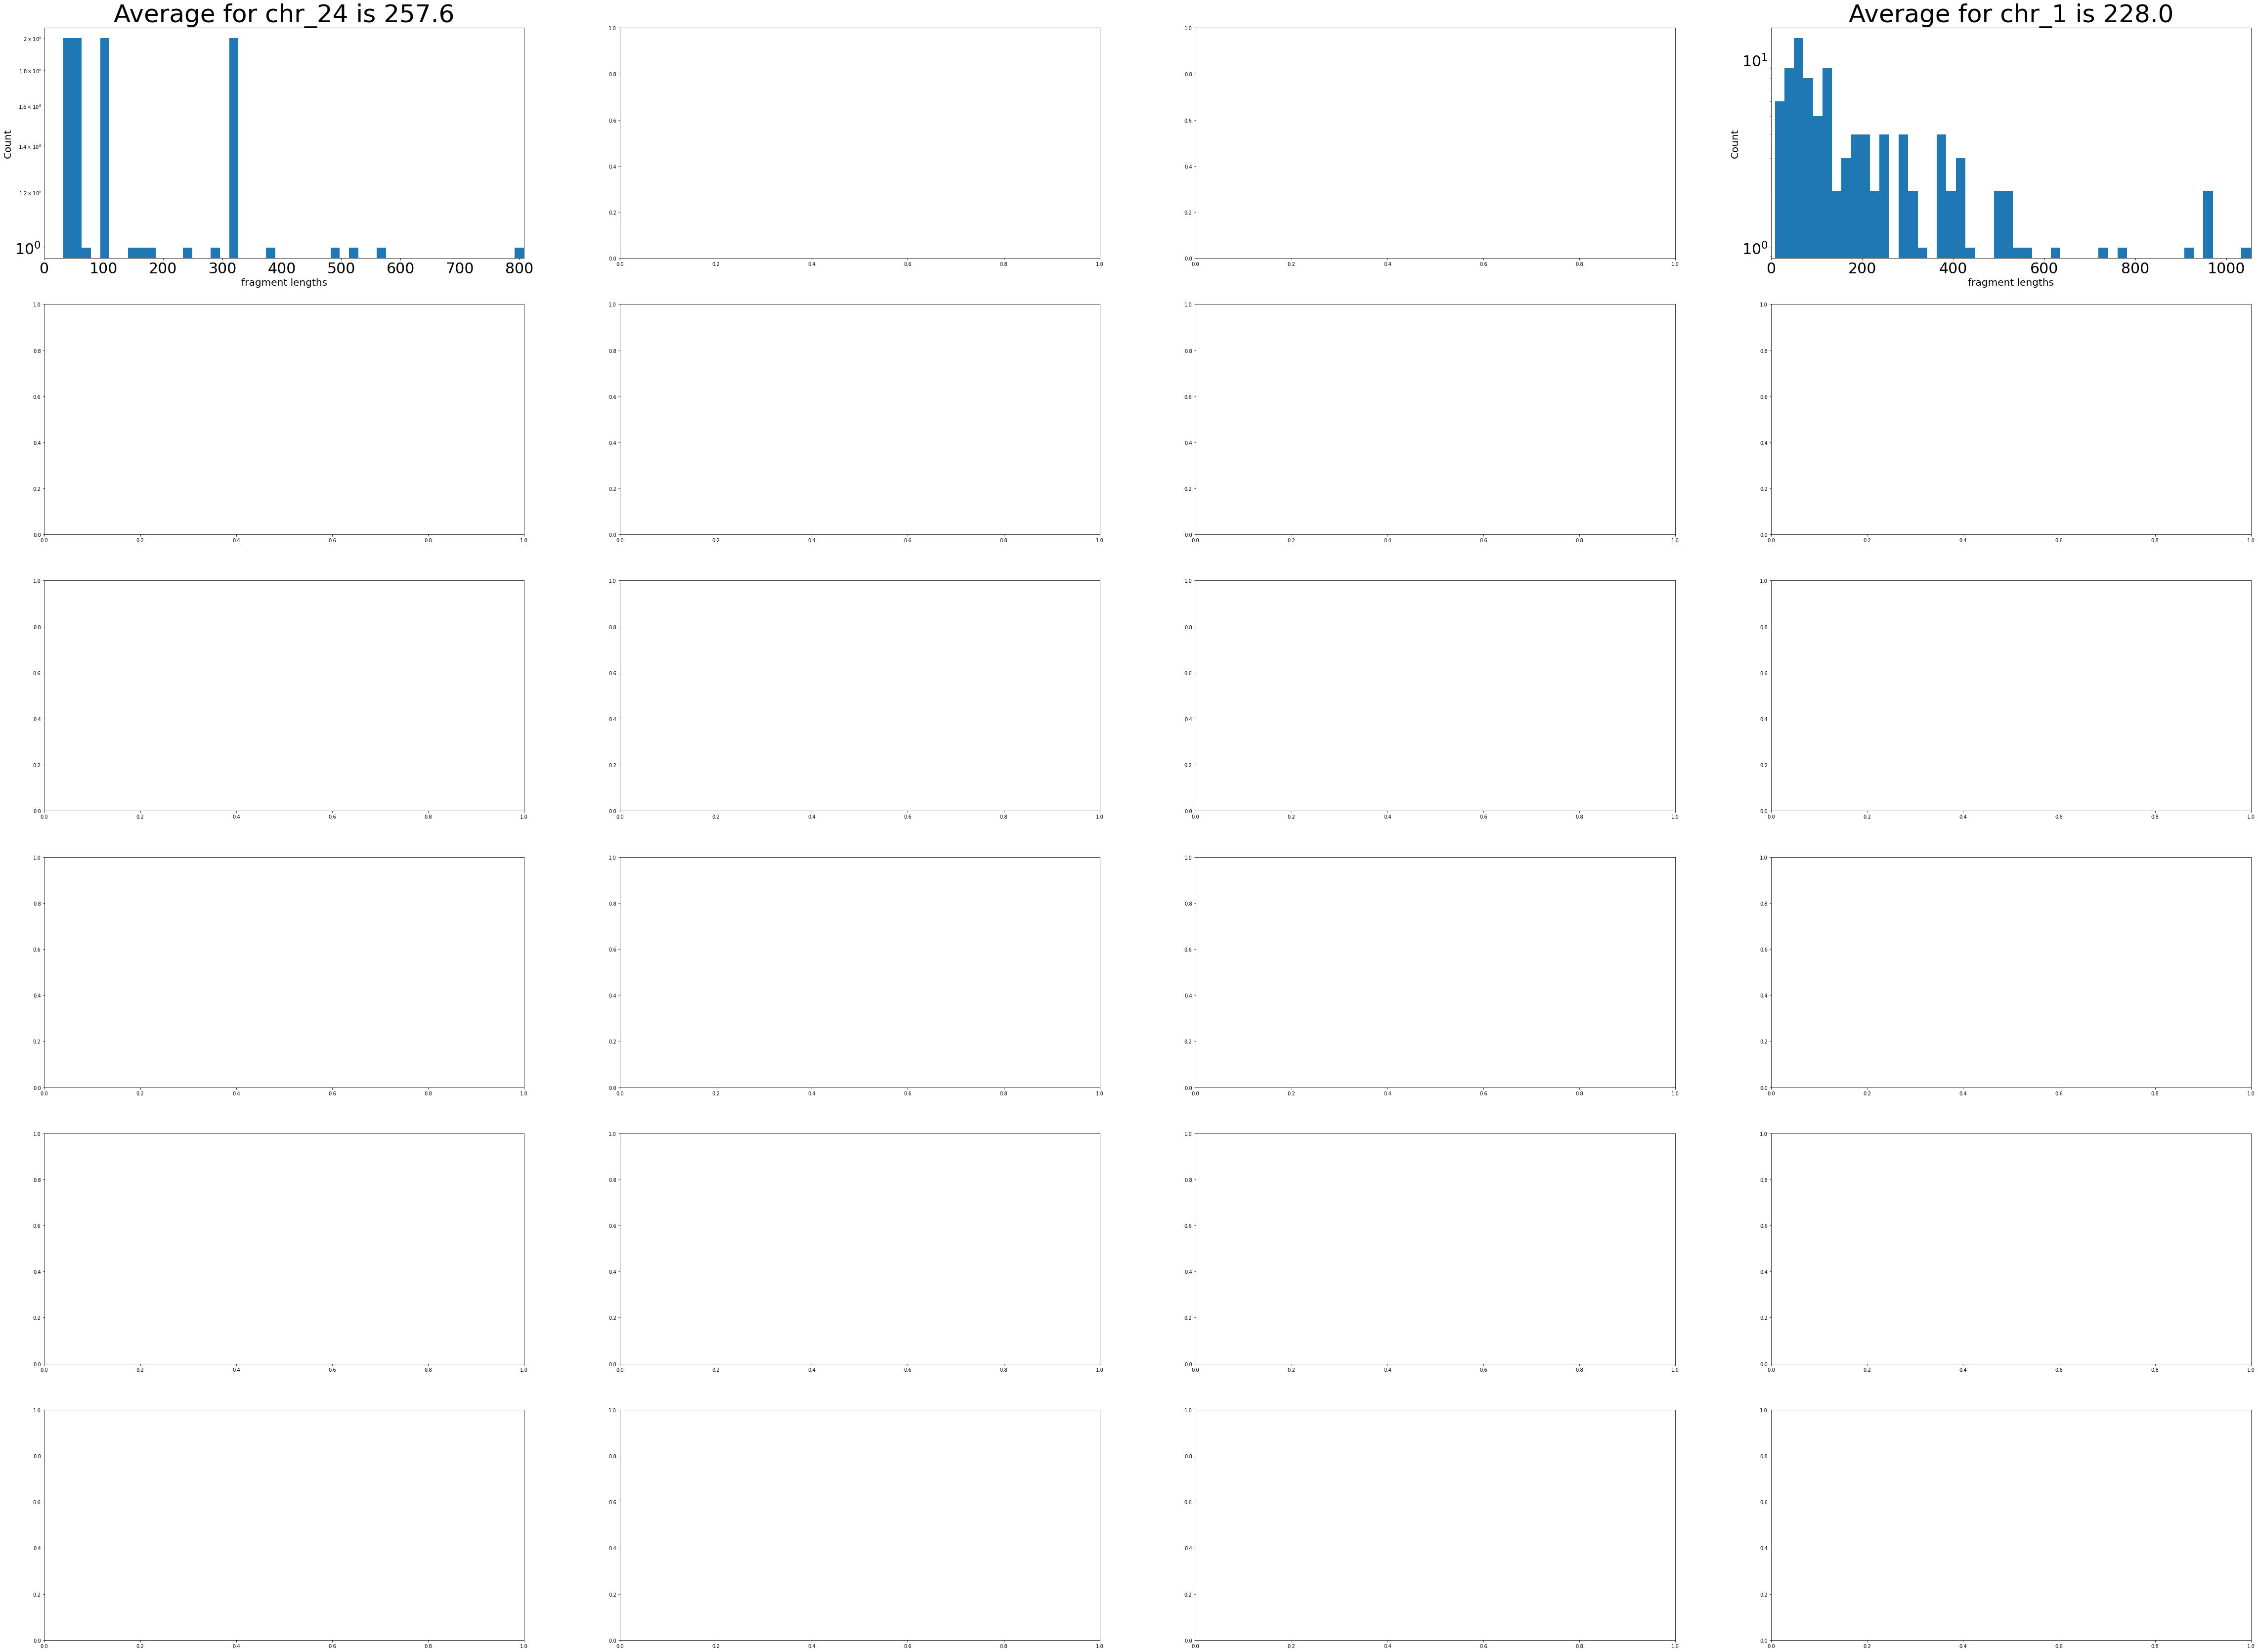

In [84]:
fig, plot = plt.subplots(6,4,figsize=(80,60))
p = 0
ches = list(dct.keys())

for li in lists_len:
    x = li
    aven = aves[p]
    plot[p//6,p%6-1].hist(x, density=False, bins=50, log = True) 
    plot[p//6,p%6-1].set_ylabel('Count', fontsize=20)
    plot[p//6,p%6-1].set_xlabel('fragment lengths', fontsize=20)
    plot[p//6,p%6-1].set_title('Average for chr_{} is {}'.format(ches[p],round(aven, 1)), fontsize=50)
    plot[p//6,p%6-1].tick_params(axis='x', labelsize=30)
    plot[p//6,p%6-1].tick_params(axis='y', labelsize=30)
    plot[p//6,p%6-1].set_xlim([0, max(x)])
    p += 1
plt.savefig('chss')

In [58]:
print(round(ave(aves), 1))

242.8


In [57]:
aves

[228.02020202020202, 257.57894736842104]

In [59]:
print('Average is {}'.format(round(ave(aves), 1)))

Average is 242.8


In [65]:
p = 6

In [66]:
p//2

3

In [67]:
p%3

0